# DSCI100 Project Proposal: Heart Disease Diagnosis Classification

## 1. Introduction

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.*

I will be answering the following question:

#### Can cholesterol levels, age, and resting blood pressure be used to accurately predict the likelihood of a heart disease diagnosis in patients?

To answer this question, I will be using the Cleveland dataset from UCI's Heart Disease database. It contains information from 302 patients across 14 categorical and numerical variables. For the purposes of this analysis I will be focusing on the following variables:
 - Age (age), in years
 - Cholesterol (chol), in mg/dl
 - Resting blood pressure (trestbps), in mmHg
 - Diagnosis (num), where values 1-4 correspond to a positive diagnosis, and 0 corresponds to a negative diagnosis

## 2. Preliminary Exploratory Data Analysis

In [34]:
library(tidyverse)
library(data.table)

In [18]:
# Demonstrate that the dataset can be read from the web into R 

cleveland <- read_csv("processed.cleveland.data")

# Clean and wrangle your data into a tidy format
# Here, I am assigning column names from the UCI Heart Disease Database webpage,
# and making the categorical variables into factor types.

cols <- c("age", "sex", "cp", "trestbps", 
             "chol", "fbs", "restecg", "thalach", 
             "exang", "oldpeak", "slope", "ca", 
             "thal", "num")
colnames(cleveland) <- cols
cleveland <- cleveland |> mutate(sex = as.factor(sex),
                    cp = as.factor(cp),
                    fbs = as.factor(fbs),
                    restecg = as.factor(restecg),
                    exang = as.factor(exang),
                    slope = as.factor(slope),
                    thal = as.factor(thal),
                    num = as.factor(num))

# Since the variable we are classifying is 'num', the diagnosis of heart disease, 
# we must separate positive diagnoses (1-4) from negative diagnoses (0).
# I will also rename the 'num' column to 'diagnosis' to make it more readable.

cleveland <- cleveland |>
    mutate(num = fct_recode(num, "Positive" = "1", "Positive" = "2", 
                            "Positive" = "3", "Positive" = "4", 
                            "Negative" = "0")) |>
    setnames("num", "diagnosis")

cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Negative
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Positive
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Negative
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,Positive
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,Positive


### Summary Table

In [42]:
# Number of observations, means of 'trestbps', 'age', and 'chol', and how many rows have missing data, by 'diagnosis'.
# I am also adding a totals row with the total number of observations, the means for 'trestbps', 'age', and 'chol' 
# for the whole cleveland dataset, and the total number of missing observations.

summary_cleveland <- cleveland |>
    group_by(diagnosis) |>
    summarize(num_of_obs = n(),
              mean_trestbps = mean(trestbps),
              mean_age = mean(age)
              mean_chol = mean(chol),
              missing_data = sum(is.na(cleveland)))

summary_cleveland <- summary_cleveland |>
    add_row(diagnosis = "Total", 
            num_of_obs = sum(summary_cleveland$num_of_obs),
            mean_trestbps = mean(cleveland$trestbps),
            mean_age = mean(cleveland$age),
            mean_chol = mean(cleveland$chol),
            missing_data = sum(summary_cleveland$missing_data))
summary_cleveland

diagnosis,num_of_obs,mean_trestbps,mean_age,mean_chol,missing_data
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
Negative,163,129.1534,52.52147,242.6994,0
Positive,139,134.5683,56.62590,251.4748,0
Total,302,131.6457,54.41060,246.7384,0


### Preliminary Visualization

In [87]:
options(repr.plot.width = 6, repr.plot.height = 4)

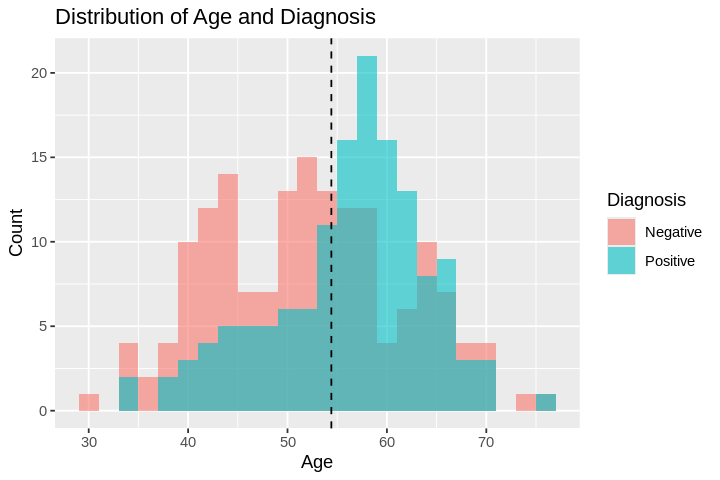

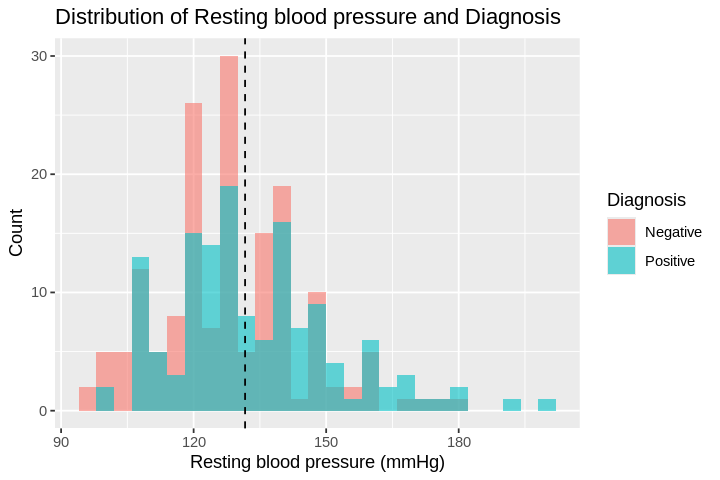

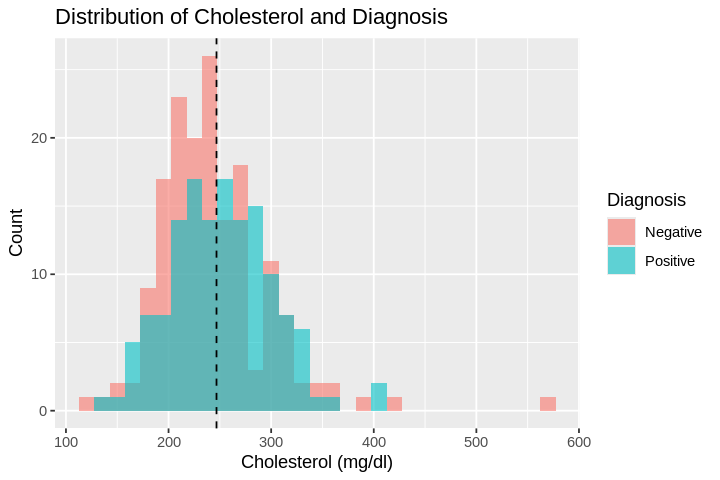

In [94]:
# Making histograms to analyze the distributions of each of the 3 predictor variables, using colour to differentiate the diagnoses

age_histogram <- cleveland |>
    ggplot(aes(x = age, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 2) + 
    geom_vline(xintercept = mean(cleveland$age), linetype = "dashed") +
    labs(x = "Age", y = "Count", fill = "Diagnosis", title = "Distribution of Age and Diagnosis")

trestbps_histogram <- cleveland |>
    ggplot(aes(x = trestbps, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 4) + 
    geom_vline(xintercept = mean(cleveland$trestbps), linetype = "dashed") +
    labs(x = "Resting blood pressure (mmHg)", y = "Count", fill = "Diagnosis", title = "Distribution of Resting blood pressure and Diagnosis")

chol_histogram <- cleveland |>
    ggplot(aes(x = chol, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 15) + 
    geom_vline(xintercept = mean(cleveland$chol), linetype = "dashed") +
    labs(x = "Cholesterol (mg/dl)", y = "Count", fill = "Diagnosis", title = "Distribution of Cholesterol and Diagnosis")

age_histogram
trestbps_histogram
chol_histogram

## 3. Methods

*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

*Describe at least one way that you will visualize the results.*

## 4. Expected Outcomes and Significance

*What do you expect to find?*

*What impact could such findings have?*

*What future questions could this lead to?*